In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

predictions = {}
acc_scores = {}
recall_scores = {}
f1_scores = {}
precision_scores = {}
cpu_times = {}
models = []

for filename in os.listdir("statistics"):
   with open(os.path.join("statistics", filename), 'r') as f: # open in readonly mode
      stats = json.load(f)
      model_name = filename.split('.')[0]
      predictions[model_name] = stats["predicted"]
      acc_scores[model_name] = stats["Accuracy Score"]
      recall_scores[model_name] = stats["Recall Score"]
      precision_scores[model_name] = stats["Precision Score"]
      f1_scores[model_name] = stats["F1 Score"]
      cpu_times[model_name] = stats["cpu time"]
      models.append(model_name)

data = {
   "Acc Score": acc_scores,
   "Precision Score": precision_scores,
   "Recall Score": recall_scores,
   "F1 Score": f1_scores,
   "CPU Time": cpu_times
}

df = pd.DataFrame(data, index=models)

## Model Metrics Comparison

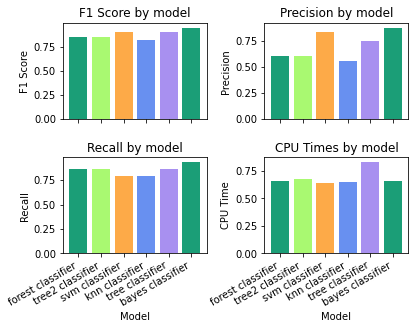

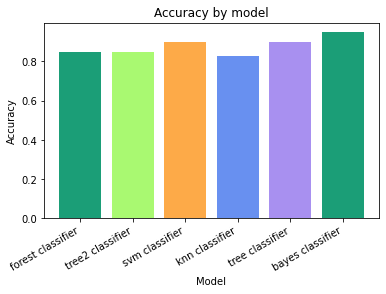

,Acc Score,Precision Score,Recall Score,F1 Score,CPU Time
forest classifier,0.850,0.600000,0.866025,0.666667,0.66
tree2 classifier,0.850,0.600000,0.866025,0.666667,0.68
svm classifier,0.900,0.833333,0.790569,0.714286,0.64
knn classifier,0.825,0.555556,0.790569,0.588235,0.65
tree classifier,0.900,0.750000,0.866025,0.750000,0.83
bayes classifier,0.950,0.875000,0.935414,0.875000,0.66


In [2]:
fig, ax = plt.subplots(2, 2)
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0'] 


ax[0, 0].set_title('F1 Score by model')
ax[0, 0].set_ylabel('F1 Score')
ax[0, 0].set_xlabel('Model')
ax[0, 0].bar(acc_scores.keys(), acc_scores.values(), color = colors)

ax[0, 1].set_title('Precision by model')
ax[0, 1].set_ylabel('Precision')
ax[0, 1].set_xlabel('Model')
ax[0, 1].bar(precision_scores.keys(), precision_scores.values(), color = colors)

ax[1, 0].set_title('Recall by model')
ax[1, 0].set_ylabel('Recall')
ax[1, 0].set_xlabel('Model')
ax[1, 0].bar(recall_scores.keys(), recall_scores.values(), color = colors)

ax[1, 1].set_title('CPU Times by model')
ax[1, 1].set_ylabel('CPU Time')
ax[1, 1].set_xlabel('Model')
ax[1, 1].bar(cpu_times.keys(), cpu_times.values(), color = colors)


fig.autofmt_xdate()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fig2, ax2 = plt.subplots()
ax2.set_title('Accuracy by model')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Model')
ax2.bar(acc_scores.keys(), acc_scores.values(), color = colors)

fig2.autofmt_xdate()
plt.show()
df